# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Importing required Libraries

In [1]:
import pickle
import tensorflow as tf
import tensorflow as tff
from tensorflow.contrib.layers import flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

---
## Step 0: Load The Data

In [21]:
training_file = "../data/train.p"
validation_file = "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Completing the basic data summary below.

In [22]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualizing the dataset

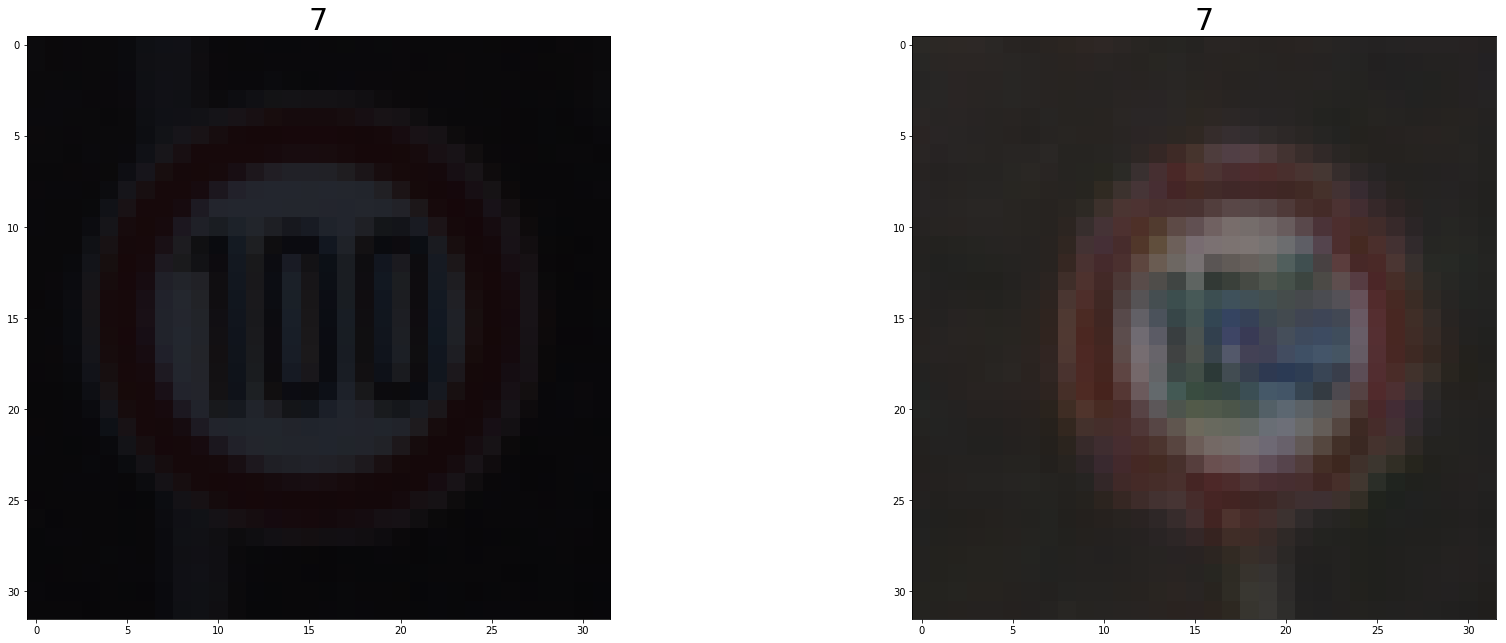

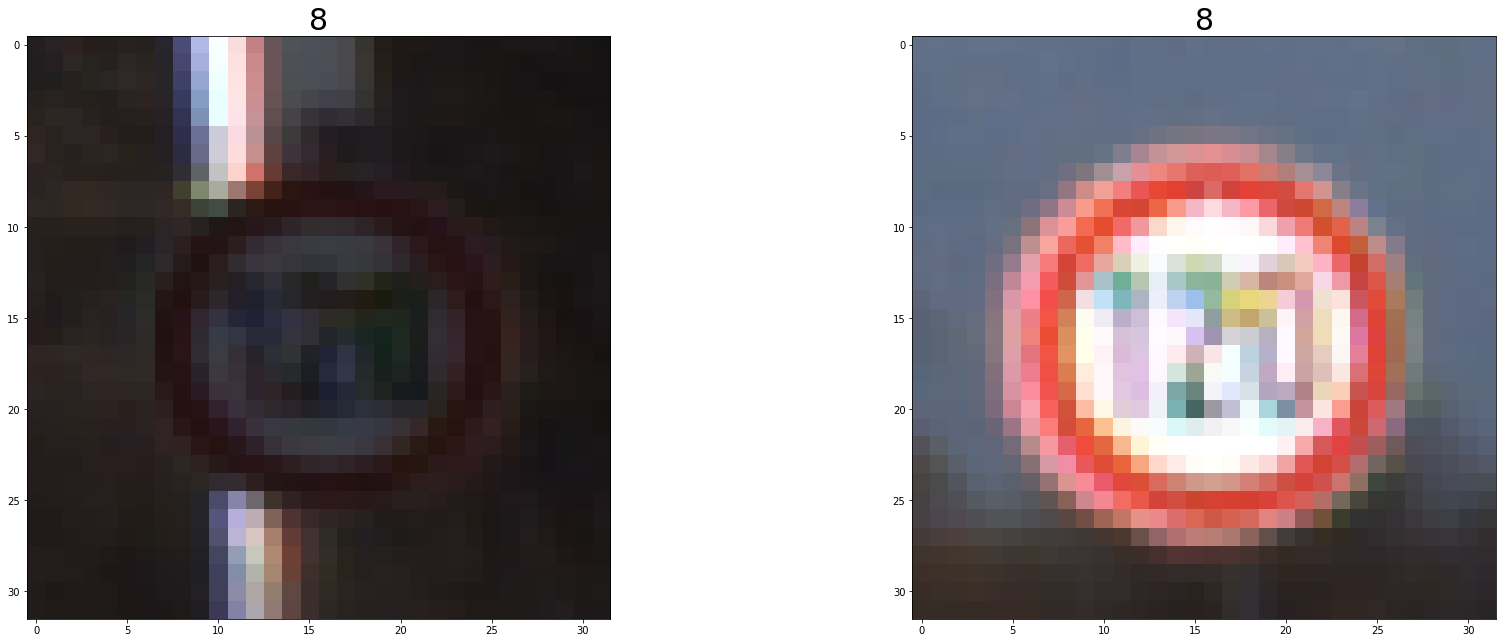

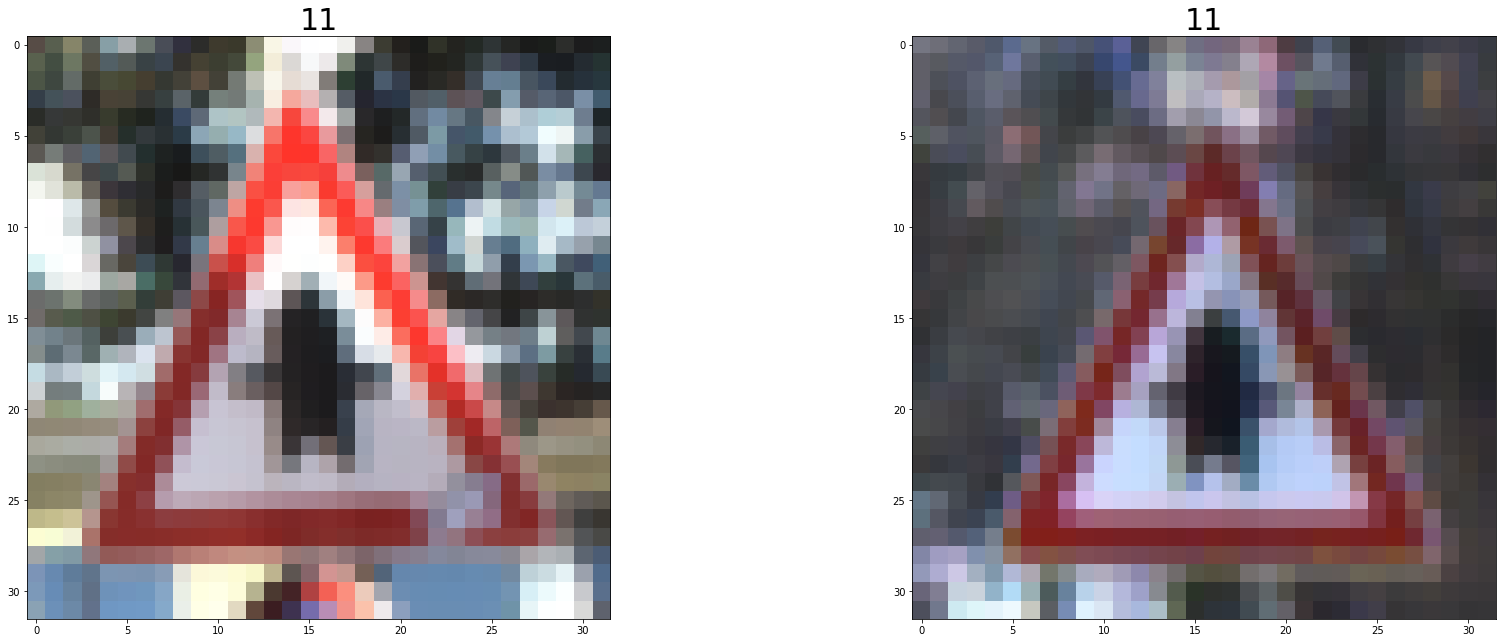

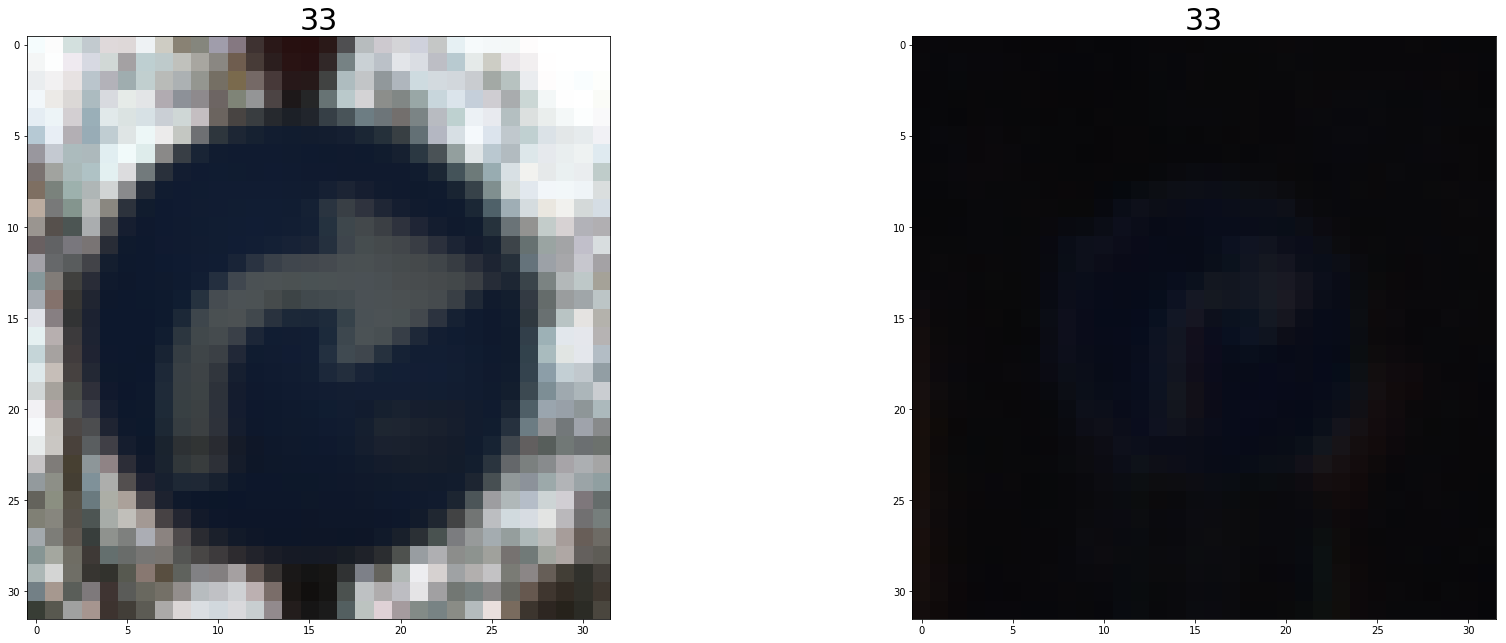

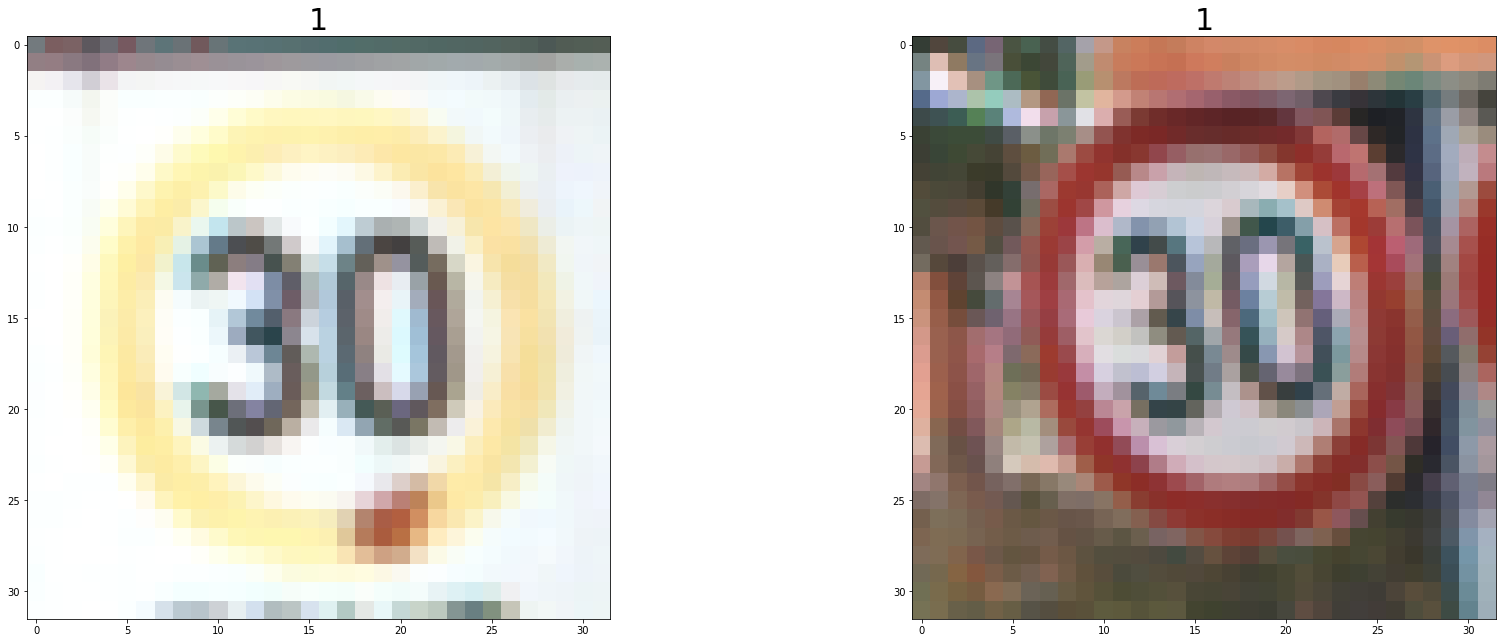

In [23]:
### Data exploration visualization code goes here.

#Visualising 10 random images from training set
#These are some images out of thousands which will train the brain of our model 
#to recognise the traffic signs correctly
for i in np.random.randint(low=0, high=n_train-1, size=5):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(X_train[i])
    ax1.set_title(y_train[i], fontsize=30)
    ax2.imshow(X_train[i+100])
    ax2.set_title(y_train[i+100], fontsize=30)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

%matplotlib inline

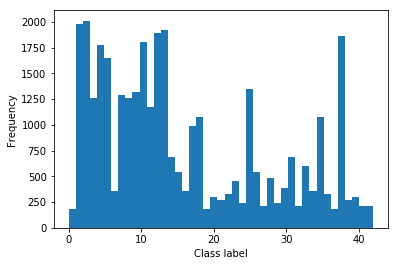

In [5]:
#A histogram to understand the distribution of the classes in our training set
#will help is visualize the number of inputs available for each class
plt.hist(y_train, bins=n_classes)
plt.xlabel("Class label")
plt.ylabel("Frequency")
plt.show()
distribution, classes = np.histogram(y_train, bins=np.arange(n_classes), density=True)

----

## Step 2: Design and Test a Model Architecture

Implement a deep learning model(LeNet-5) that learns to recognize traffic signs. I will train and test the model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

### Pre-process the Data Set (normalization, grayscale, etc.)


In [6]:
#Converting the images to grayscale
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train.shape)
print('Grayscale shape:', X_train_gry.shape)

X_train = X_train_gry
X_valid = X_valid_gry
X_test = X_test_gry

RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)


In [7]:
#Normalising the datasets
X_train_normalized = (X_train - 128)/128
X_valid_normalized = (X_valid - 128)/128
X_test_normalized = (X_test - 128)/128

print(np.mean(X_train))
print(np.mean(X_valid))
print(np.mean(X_test))
print(np.mean(X_train_normalized))
print(np.mean(X_valid_normalized))
print(np.mean(X_test_normalized))

X_train = X_train_normalized
X_valid = X_valid_normalized
X_test = X_test_normalized

82.677589037
83.5564273756
82.1484603612
-0.354081335648
-0.347215411128
-0.358215153428


### Model Architecture

In [8]:
EPOCHS = 50
BATCH_SIZE = 50

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, None)
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

In [10]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluating how well the loss and accuracy of the model for a given dataset.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenetttt')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.829

EPOCH 2 ...
Validation Accuracy = 0.878

EPOCH 3 ...
Validation Accuracy = 0.904

EPOCH 4 ...
Validation Accuracy = 0.915

EPOCH 5 ...
Validation Accuracy = 0.911

EPOCH 6 ...
Validation Accuracy = 0.890

EPOCH 7 ...
Validation Accuracy = 0.922

EPOCH 8 ...
Validation Accuracy = 0.922

EPOCH 9 ...
Validation Accuracy = 0.916

EPOCH 10 ...
Validation Accuracy = 0.912

EPOCH 11 ...
Validation Accuracy = 0.942

EPOCH 12 ...
Validation Accuracy = 0.933

EPOCH 13 ...
Validation Accuracy = 0.928

EPOCH 14 ...
Validation Accuracy = 0.935

EPOCH 15 ...
Validation Accuracy = 0.923

EPOCH 16 ...
Validation Accuracy = 0.927

EPOCH 17 ...
Validation Accuracy = 0.914

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 19 ...
Validation Accuracy = 0.934

EPOCH 20 ...
Validation Accuracy = 0.921

EPOCH 21 ...
Validation Accuracy = 0.937

EPOCH 22 ...
Validation Accuracy = 0.934

EPOCH 23 ...
Validation Accuracy = 0.946

EPOCH 24 ...
Validation Accura

## Testing the Model
A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenetttt
Test Accuracy = 0.926


---

## Step 3: Test the Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

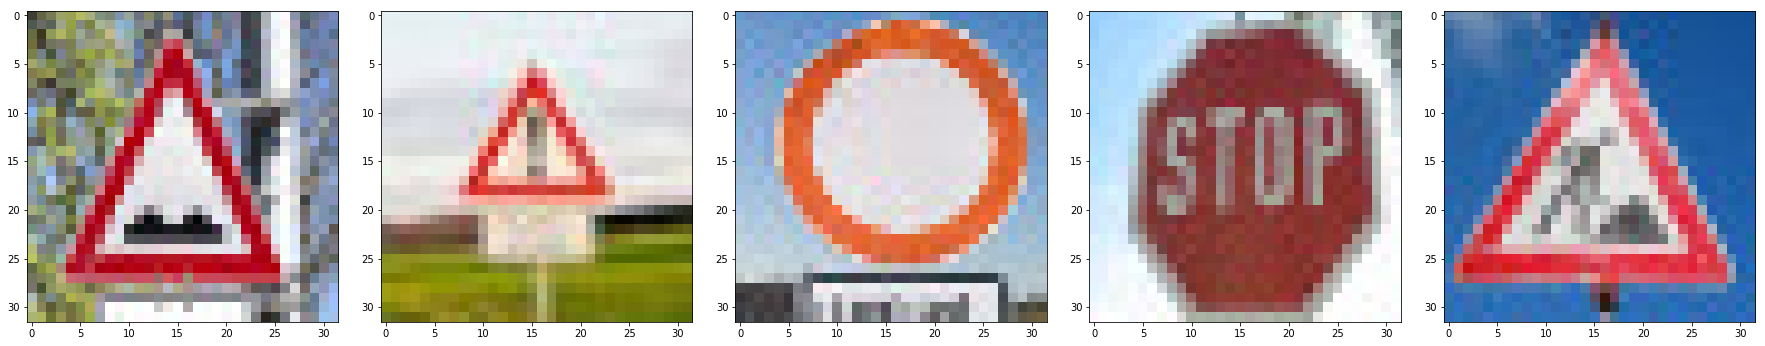

(5, 32, 32, 3)
(5, 32, 32, 1)
[22 18 15 14 25]


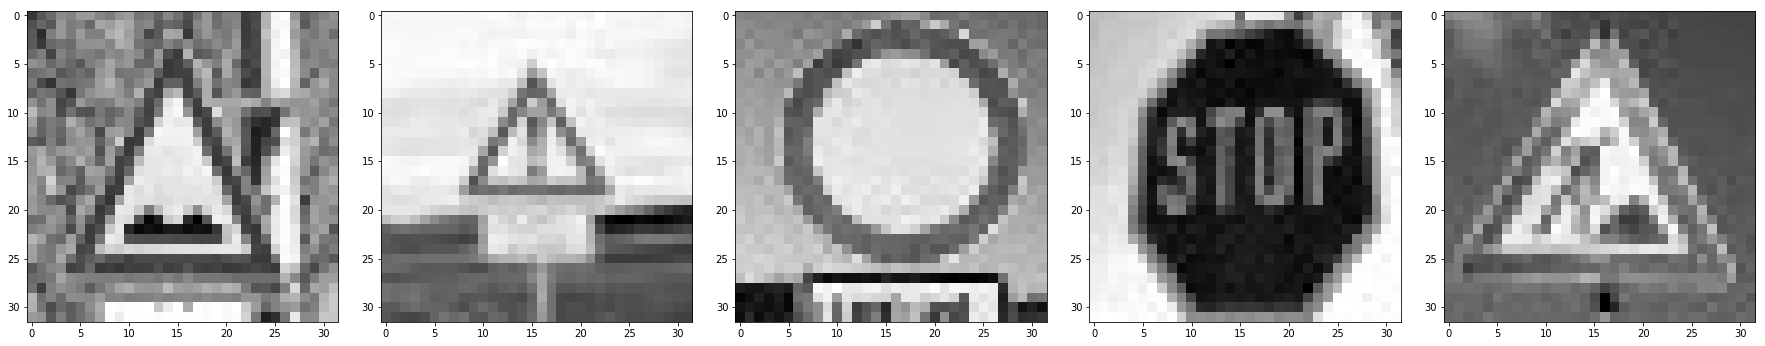

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import glob
import matplotlib.image as mpimg
import cv2 as cv2
import scipy.ndimage as ndimage
from scipy.misc import imread

new_imageset=['my_images/bumpy.jpg','my_images/caution.jpg','my_images/no-vehicles.jpg','my_images/stop.jpg','my_images/work.jpg']
my_images = np.zeros([len(new_imageset),32,32,3],dtype=np.uint8)

for i in range(len(new_imageset)):
    my_images[i] = ndimage.imread(new_imageset[i])
my_labels = np.array([22,18,15,14,25],dtype=np.uint8)
    
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24, 9))
f.tight_layout()
ax1.imshow(my_images[0])
ax2.imshow(my_images[1])
ax3.imshow(my_images[2])
ax4.imshow(my_images[3])
ax5.imshow(my_images[4])
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

my_images = np.asarray(my_images)
my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)
my_images_normalized = (my_images_gry - 128)/128 
print(my_images.shape)
print(my_images_normalized.shape)
print(my_labels)

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24, 9))
f.tight_layout()
ax1.imshow(my_images_normalized[0].squeeze(), cmap='gray')
ax2.imshow(my_images_normalized[1].squeeze(), cmap='gray')
ax3.imshow(my_images_normalized[2].squeeze(), cmap='gray')
ax4.imshow(my_images_normalized[3].squeeze(), cmap='gray')
ax5.imshow(my_images_normalized[4].squeeze(), cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Predicting the Sign Type for Each Image and Analyzing Performance

In [15]:
# Running the predictions here and using the model to output the prediction for each image.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenetttt
Test Set Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from ./lenetttt


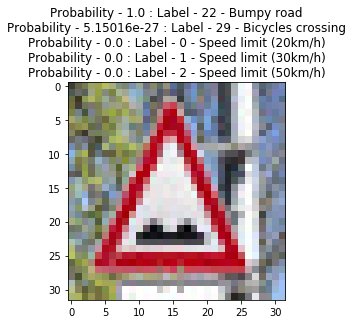

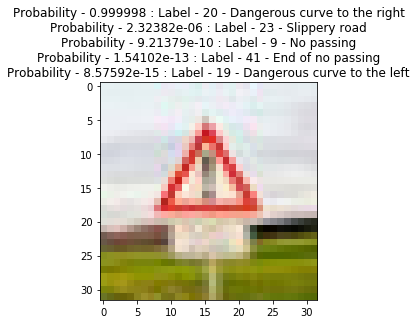

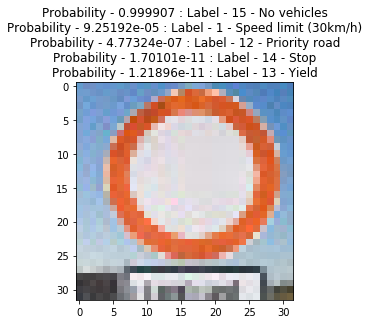

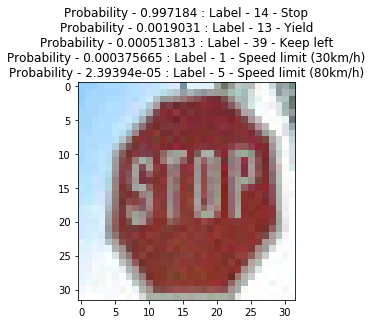

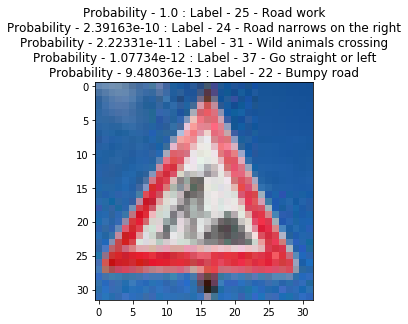

In [17]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

csv_data = np.genfromtxt('signnames.csv', delimiter=',', names=True, dtype=None)
sign_names = [t[1].decode('utf-8') for t in csv_data]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, y:my_labels})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, y:my_labels})
    
for i in range(len(new_imageset)):
    img = ndimage.imread(new_imageset[i])
    title=''
    title += 'Probability - ' + str(my_top_k[0][i][0]) + ' : ' + 'Label - ' + str(my_top_k[1][i][0]) + ' - ' + sign_names[my_top_k[1][i][0]] +'\n'+ 'Probability - ' + str(my_top_k[0][i][1]) + ' : ' + 'Label - ' + str(my_top_k[1][i][1]) + ' - ' + sign_names[my_top_k[1][i][1]] +'\n'+ 'Probability - ' + str(my_top_k[0][i][2]) + ' : ' + 'Label - ' + str(my_top_k[1][i][2]) + ' - ' + sign_names[my_top_k[1][i][2]] +'\n'+ 'Probability - ' + str(my_top_k[0][i][3]) + ' : ' + 'Label - ' + str(my_top_k[1][i][3]) + ' - ' + sign_names[my_top_k[1][i][3]] +'\n'+ 'Probability - ' + str(my_top_k[0][i][4]) + ' : ' + 'Label - ' + str(my_top_k[1][i][4]) + ' - ' + sign_names[my_top_k[1][i][4]]
    plt.title(title)
    plt.imshow(img)
    plt.show()